# One Sided Selection

Đầu tiên, tìm các mẫu khó phân loại đúng từ lớp đa số. Sau đó, loại bỏ các quan sát gây nhiễu bằng cách sử dụng Tomek Links.

Tomek Links được sử dụng để xác định các mẫu gây nhiễu hoặc không rõ ràng trong quá trình phân loại. Bằng cách loại bỏ các mẫu Tomek Links, ta hy vọng giảm nhiễu và cải thiện khả năng phân loại của mô hình.

Tomek Links được xem là các cặp quan sát thuộc hai lớp khác nhau và là láng giềng gần nhất của nhau. Bằng cách loại bỏ một hoặc cả hai quan sát trong cặp này, chúng ta loại bỏ các mẫu gây nhiễu hoặc không rõ ràng từ lớp đa số.

Quá trình này giúp cải thiện khả năng phân loại của mô hình bằng cách tập trung vào các mẫu khó khăn và loại bỏ các mẫu gây nhiễu. Kích thước của bộ dữ liệu cuối cùng sẽ thay đổi tùy thuộc vào số lượng và tần suất của các Tomek Links được tìm thấy.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import OneSidedSelection

## Create data
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [3]:
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# how separate the classes are
                           random_state=1)
    
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

## Undersample with One Side Selection

[OneSidedSelection](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.OneSidedSelection.html)



In [4]:


X, y = make_data(sep=2)

# set up OSS

oss = OneSidedSelection(
    sampling_strategy='auto',  # undersamples only the majority class
    random_state=0,  # for reproducibility
    n_neighbors=1,# default, algo to find the hardest instances.
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = oss.fit_resample(X, y)

In [5]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((730, 2), (730,))

Note that more observations have been removed compared to Tomek Links alone (tip, check previous notebook).

In [7]:


y.value_counts()

0    983
1     17
dtype: int64

In [8]:
y_resampled.value_counts()

0    713
1     17
dtype: int64

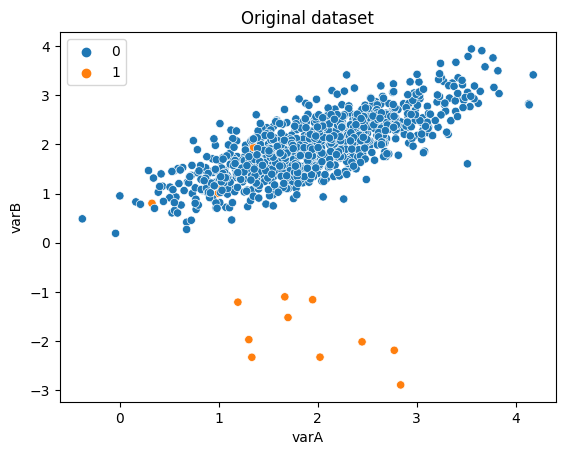

In [9]:
sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

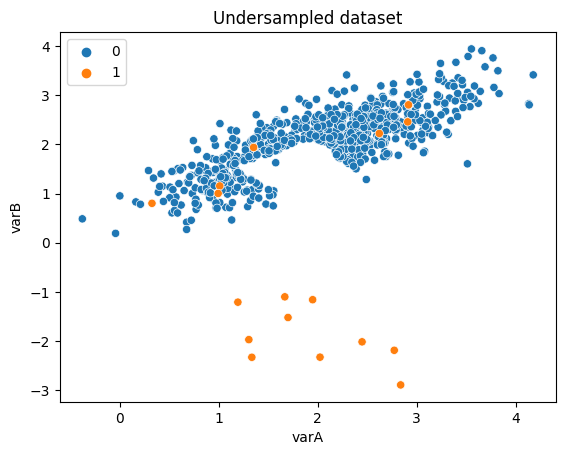

In [10]:
# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

lưu ý các nút cam bên góc phải bên trên bây giờ thấy là do bỏ bớt nút xanh đi rồi nên mới thấy

In [11]:
#dữ liệu không quá tách biệt
X, y = make_data(sep=0.5)

# set up OSS

oss = OneSidedSelection(
    sampling_strategy='auto',  # undersamples only the majority class
    random_state=0,  # for reproducibility
    n_neighbors=1,# default
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = oss.fit_resample(X, y)

In [12]:
# original data

X.shape, y.shape

((1000, 2), (1000,))

In [13]:
# undersampled data

X_resampled.shape, y_resampled.shape

((939, 2), (939,))

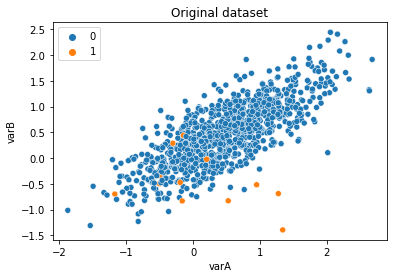

In [12]:
sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

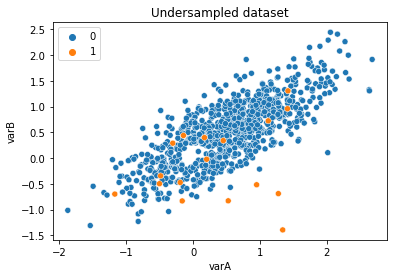

In [13]:
# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()